<h1 style="text-align:center;font-size: 3em"> Algorithmes de Machine Learning </h1>

Dans ce Notebook, nous évaluerons plusieurs approches d'apprentissage automatique pour prédire la probabilité de réadmission à l'hôpital pour les patients diabétiques.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report, accuracy_score,precision_score, roc_auc_score

In [2]:
df=pd.read_csv('CSV_Files/Diabetes_cleaned.csv')
df.head()

,RACE,GENDER,AGE_INT,DISCHARGE_DISPOSITION,ADMISSION_SOURCE,TIME_IN_HOSPITAL,MEDICAL_SPECIALTY,NUM_LAB_PROCEDURES,NUM_PROCEDURES,NUM_MEDICATIONS,...,GLIPIZIDE,GLYBURIDE,PIOGLITAZONE,ROSIGLITAZONE,INSULIN,DIABETESMED,READMITTED,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,65,Discharged to home,Referral,3,Nephrology,59,3,11,...,-2,-2,-2,-2,0,1,0,0,0.0,insulin_only
1,Caucasian,0,75,Transferred to another medical facility,Emergency,7,Orthopedics-Reconstructive,58,2,15,...,-2,-2,1,-2,0,1,0,0,1.0,insulin_combo
2,Caucasian,0,95,Discharged to home,Emergency,4,Emergency/Trauma,56,1,9,...,-2,-2,-2,-2,-2,1,0,0,0.0,other_meds
3,Caucasian,1,75,Transferred to another medical facility,Emergency,10,InternalMedicine,68,1,18,...,-2,-2,-2,-2,0,1,0,0,0.0,insulin_combo
4,Caucasian,1,55,Left AMA,Transferred from another health care facility,6,Nephrology,52,3,17,...,-2,-2,-2,-2,0,1,1,0,0.0,insulin_only


In [3]:
df.columns

Index(['RACE', 'GENDER', 'AGE_INT', 'DISCHARGE_DISPOSITION',
       'ADMISSION_SOURCE', 'TIME_IN_HOSPITAL', 'MEDICAL_SPECIALTY',
       'NUM_LAB_PROCEDURES', 'NUM_PROCEDURES', 'NUM_MEDICATIONS', 'DIAG_1',
       'DIAG_2', 'DIAG_3', 'NUMBER_DIAGNOSES', 'MAX_GLU_SERUM', 'A1CRESULT',
       'METFORMIN', 'REPAGLINIDE', 'GLIMEPIRIDE', 'GLIPIZIDE', 'GLYBURIDE',
       'PIOGLITAZONE', 'ROSIGLITAZONE', 'INSULIN', 'DIABETESMED', 'READMITTED',
       'preceding_year_visits', 'number_changes', 'insulin_treatment'],
      dtype='object')

In [4]:
X = df.drop('READMITTED', 1)
X_dum = pd.get_dummies(X, drop_first = True)
y = df['READMITTED']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state = 0, test_size = 0.3, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 


((17735, 145), (7602, 145), (17735,), (7602,))

In [5]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

### Arbres de décisions

In [6]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)

DT.fit(X_train,y_train)
imp = pd.DataFrame(DT.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)

,Importance
NUM_LAB_PROCEDURES,0.102829
NUM_MEDICATIONS,0.080634
TIME_IN_HOSPITAL,0.058017
preceding_year_visits,0.048388
AGE_INT,0.041802
...,...
DIAG_2_Sense_Organs,0.000000
MEDICAL_SPECIALTY_Gynecology,0.000000
MEDICAL_SPECIALTY_Endocrinology_Metabolism,0.000000
MEDICAL_SPECIALTY_Endocrinology,0.000000


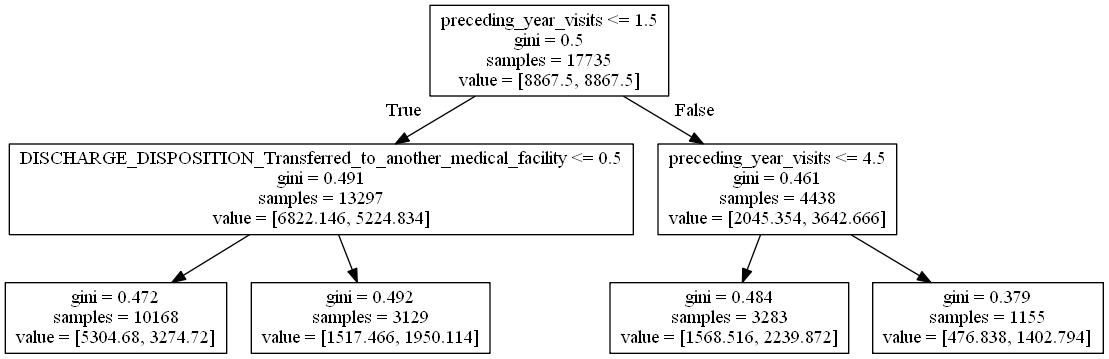

In [7]:
tree = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced',max_depth=2)
tree.fit(X_train, y_train)

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X_train.columns
# Create DOT data
dot_data = export_graphviz(tree, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


### Random Forest

In [8]:

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0, n_jobs = -1,class_weight='balanced_subsample')
RF.fit(X_train,y_train)
imp = pd.DataFrame(RF.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)


,Importance
NUM_LAB_PROCEDURES,8.188810e-02
NUM_MEDICATIONS,7.684449e-02
preceding_year_visits,6.491408e-02
TIME_IN_HOSPITAL,5.605033e-02
AGE_INT,4.729242e-02
...,...
DISCHARGE_DISPOSITION_Not_Available,4.577223e-21
MEDICAL_SPECIALTY_Pediatrics_Pulmonology,0.000000e+00
MEDICAL_SPECIALTY_Neurophysiology,0.000000e+00
MEDICAL_SPECIALTY_SportsMedicine,0.000000e+00


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 1.0
Train Confusion Matrix:
 [[15807     0]
 [    0  1928]] 

Train F1 Score: 1.0
Train Precision Score: 1.0
Train Recall Score: 1.0
Train ROC_AUC Score: 0.9999999999999999

Test Accuracy Score: 0.8923967377006051
Test Confusion Matrix:
 [[6770    6]
 [ 812   14]] 

Test F1 Score: 0.03309692671394799
Test Precision Score: 0.7
Test Recall Score: 0.01694915254237288
Test ROC_AUC Score: 0.6316778024418901


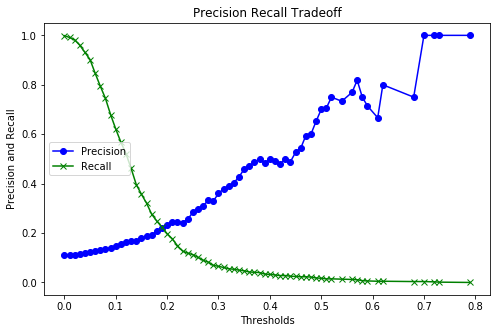

In [10]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize = (8, 5))
prec, rec, thresh = precision_recall_curve(y_test, y_test_prob)
plt.plot(thresh, prec[1:], marker = 'o', c = 'b', label = 'Precision')
plt.plot(thresh, rec[1:], marker = 'x', c = 'g', label = 'Recall')
plt.legend(loc = 'center left')
plt.xlabel("Thresholds")
plt.ylabel('Precision and Recall')
plt.title('Precision Recall Tradeoff')
plt.show()

Best Threshold=0.120000, G-Mean=0.594


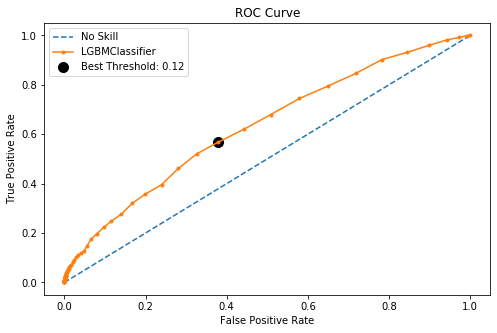

In [11]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (8, 5))
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LGBMClassifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', alpha = 1, edgecolors = 'k', s = 100,
            label='Best Threshold: '+str(round(thresholds[ix], 3)))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc = 'best')
# show the plot
plt.show()

### Regression logistique + SVM

In [12]:
models = []

models.append(('LR', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                              ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear'))])))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('RF', RandomForestClassifier(random_state = 0, n_jobs = -1)))
models.append(('SVC', Pipeline([("Transformer", PowerTransformer()),
                                ("Scaler", StandardScaler()),
                                ("SVC", SVC(random_state = 0, probability=True))])))



## Validation Set Scores
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []
Training_Time=[]
Prediction_Time=[]

for name, model in models:
    start_time = time.time()    
    model.fit(X_train, y_train)
    end_time = time.time()
    Training_Time.append(end_time - start_time)
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    Prediction_Time.append(end_time-start_time)
    
    y_proba = model.predict_proba(X_test)[:, 1]
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))
    names.append(name)
models_df = pd.DataFrame({'Model' : names, 'Precision' : precision, 'Recall' : recall,
                          'F1' : f1, 'Accuracy' : accuracy, 'ROC_AUC' : roc_auc,
                          'Training_Time':Training_Time,'Prediction_Time':Prediction_Time})
models_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Model,Precision,Recall,F1,Accuracy,ROC_AUC,Training_Time,Prediction_Time
0,LR,0.400000,0.004843,0.009569,0.891081,0.632865,4.749153,0.061964
1,DT,0.150491,0.167070,0.158348,0.807024,0.526053,0.485697,0.012995
2,RF,0.700000,0.016949,0.033097,0.892397,0.631678,1.874840,0.111933
3,SVC,0.600000,0.007264,0.014354,0.891607,0.567139,390.847938,9.523127


Les résultats peuvent être amélioré